아래에 3개로 나눠진 이상한 코드들은 한글폰트 설치한 겁니다

3개 실행해주신 다음에 런타임초기화 해주시고 두번째 코드부터 쭉 실행해주시면 한글화 가능합니다:)

In [ ]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (20, 10)
register_matplotlib_converters()
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

In [ ]:
from google.colab import drive
ROOT = '/content/drive'
drive.mount(ROOT)

Mounted at /content/drive


In [ ]:
%cd drive/'My Drive'/'Colab Notebooks'/'PROJECT_DATA'

/content/drive/My Drive/Colab Notebooks/PROJECT_DATA


In [ ]:
%ls

신한카드데이터.csv   국민카드데이터.xlsx
신한카드데이터.xlsx  신용카드증가데이터.xlsx


In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Raw = pd.DataFrame(pd.read_excel('신한카드데이터.xlsx'))

In [ ]:
Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5538 entries, 0 to 5537
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   이용일자        5538 non-null   int64 
 1   업종대분류       5538 non-null   object
 2   카드결제건수(천건)  5538 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 129.9+ KB


In [ ]:
Date = list(Raw['이용일자'])
Year = []
for item in Date:
  if item < 20200101:
    Year.append(2019)
  else:
    Year.append(2020)

In [ ]:
Raw['Year'] = Year
Raw.head(13)

,이용일자,업종대분류,카드결제건수(천건),Year
0,20190101,가전/가구,149,2019
1,20190101,가정생활/서비스,189,2019
2,20190101,교육/학원,142,2019
3,20190101,미용,464,2019
4,20190101,스포츠/문화/레저,1752,2019
5,20190101,여행/교통,260,2019
6,20190101,요식/유흥,9264,2019
7,20190101,유통,11307,2019
8,20190101,음/식료품,1192,2019
9,20190101,의료,432,2019


In [ ]:
Fur2019 = Raw[Raw['Year']==2019][Raw['업종대분류']=='가전/가구']
Fur2019['카드결제건수(천건)'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


75245

In [ ]:
def sum2019up(x):
  data = Raw[Raw['Year']==2019][Raw['업종대분류']==x]
  return data['카드결제건수(천건)'].sum()

In [ ]:
def sum2020up(x):
  data = Raw[Raw['Year']==2020][Raw['업종대분류']==x]
  return data['카드결제건수(천건)'].sum()

In [ ]:
frame = Raw.head(13)
data = list(frame['업종대분류'])
category = []
for item in data:
  category.append(item)
category

['가전/가구',
 '가정생활/서비스',
 '교육/학원',
 '미용',
 '스포츠/문화/레저',
 '여행/교통',
 '요식/유흥',
 '유통',
 '음/식료품',
 '의료',
 '자동차',
 '주유',
 '패션/잡화']

In [ ]:
sumup2019 = []
for item in category:
  sumup2019.append(sum2019up(item))
sumup2019

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[75245,
 135797,
 89085,
 131615,
 395531,
 53119,
 2754531,
 3380596,
 368699,
 597521,
 94085,
 530406,
 114904]

In [ ]:
sumup2020 = []
for item in category:
  sumup2020.append(sum2020up(item))
sumup2020

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[52728,
 102641,
 56117,
 79864,
 241967,
 25165,
 1833133,
 2329865,
 285704,
 464885,
 65154,
 360024,
 70134]

In [ ]:
total = pd.DataFrame([sumup2019,sumup2020],index=[2019,2020],columns=category)
final = total.T
final

,2019,2020
가전/가구,75245,52728
가정생활/서비스,135797,102641
교육/학원,89085,56117
미용,131615,79864
스포츠/문화/레저,395531,241967
여행/교통,53119,25165
요식/유흥,2754531,1833133
유통,3380596,2329865
음/식료품,368699,285704
의료,597521,464885


In [ ]:
def percentage_change(current, previous):
    if previous != 0 :
        return float(current - previous) / abs(previous) * 100
    else:
        return "undefined"

In [ ]:
change = []
for number in range(0,13):
  change.append(percentage_change(final.iloc[number,0:2].values[1],final.iloc[number,0:2].values[0]))
change

[-29.924911954282678,
 -24.415856020383366,
 -37.007352528484034,
 -39.319986323747294,
 -38.82476973991925,
 -52.62523767390199,
 -33.45026794034992,
 -31.081235379796933,
 -22.510231923601637,
 -22.197713553163823,
 -30.749853855556147,
 -32.122939785749026,
 -38.96296038432082]

In [ ]:
final['감소율']=change
final

,2019,2020,감소율
가전/가구,75245,52728,-29.924912
가정생활/서비스,135797,102641,-24.415856
교육/학원,89085,56117,-37.007353
미용,131615,79864,-39.319986
스포츠/문화/레저,395531,241967,-38.824770
여행/교통,53119,25165,-52.625238
요식/유흥,2754531,1833133,-33.450268
유통,3380596,2329865,-31.081235
음/식료품,368699,285704,-22.510232
의료,597521,464885,-22.197714


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


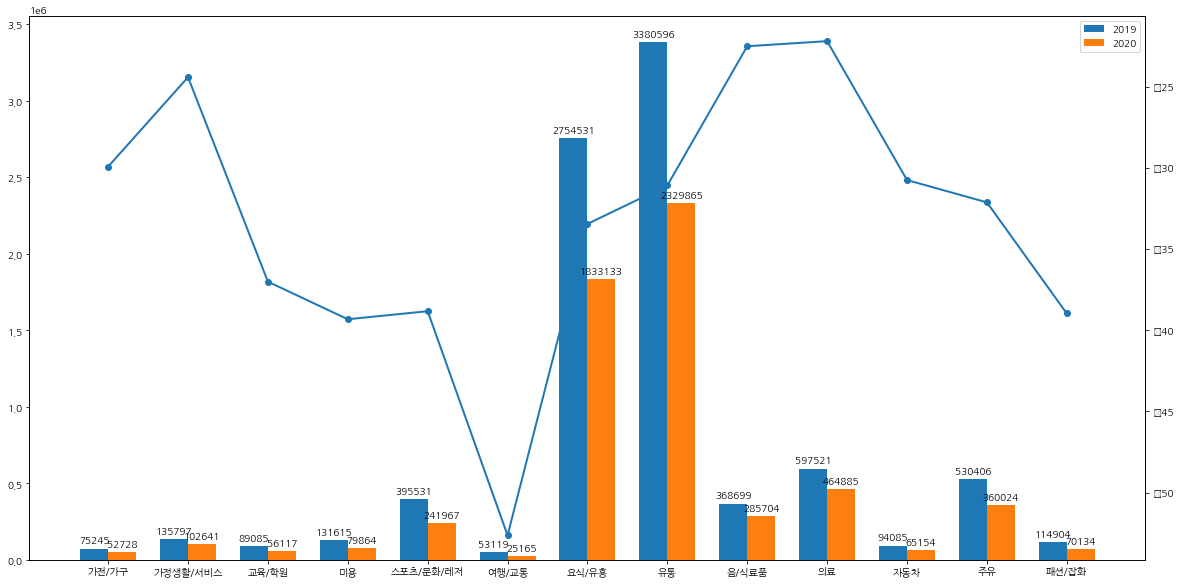

In [ ]:
x = np.arange(len(category))
width = 0.35

fig, ax = plt.subplots()
rects1=ax.bar(x - width/2, sumup2019, width, label='2019')
rects2=ax.bar(x + width/2, sumup2020, width, label='2020')
ax.legend() 

def autolabel(rects):
    for rect in rects:
        height = rect.get_height() #막대의 높이를 height로 지정
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
ax.set_xticks(x)
ax.set_xticklabels(category)

ax2 = ax.twinx()
ax2.plot(change,
         linestyle='-',
         marker='o', linewidth=2.0)
plt.show()